In [20]:
#Import the libraries we need 
import pandas as pd
import numpy as np
import seaborn as sns

In [21]:
#Read in the data
SP500 = pd.read_csv("/home/volatily/market_data/Market Data US SP 500.csv")
T5Y = pd.read_csv("/home/volatily/market_data/Market Data UST05Y_U4.csv")

In [22]:
#How far into the future should we forecast?
look_ahead = 20

In [23]:
#Make sure the data starts with the oldest day first
SP500 = SP500[::-1].reset_index().set_index("Time").drop(columns=["index"])
T5Y = T5Y[::-1].reset_index().set_index("Time").drop(columns=["index"])

In [24]:
#Insert the label
SP500["Target SP500"] = SP500["Close"].shift(-look_ahead)
SP500["Binary Target SP500"] = 0
SP500.loc[SP500["Close"] < SP500["Target SP500"],"Binary Target SP500"] = 1
SP500.dropna(inplace=True)

In [25]:
#Merge the data
merged_df = pd.merge(SP500,T5Y,how="inner",left_index=True,right_index=True,suffixes=(" SP500"," T5Y"))

In [26]:
#Add a new column to show that the data is best seperated by time
merged_df["Candle"] = np.arange(0,merged_df.shape[0])

In [7]:
#Let's observe the merged dataframe
merged_df

Open SP500  High SP500  Low SP500  Close SP500  \
Time                                                                  
2024.07.11 05:43:00     5637.89     5638.15    5637.89      5638.14   
2024.07.11 05:44:00     5638.14     5638.40    5638.14      5638.14   
2024.07.11 05:45:00     5638.40     5638.40    5637.89      5637.90   
2024.07.11 05:46:00     5637.90     5637.90    5637.89      5637.90   
2024.07.11 05:47:00     5637.90     5637.90    5637.39      5637.40   
...                         ...         ...        ...          ...   
2024.07.22 09:39:00     5536.37     5536.62    5536.12      5536.37   
2024.07.22 09:40:00     5536.37     5536.37    5536.12      5536.37   
2024.07.22 09:41:00     5536.37     5536.62    5535.87      5535.87   
2024.07.22 09:42:00     5535.87     5536.12    5535.62      5535.87   
2024.07.22 09:43:00     5535.87     5535.87    5534.62      5534.87   

                     Target SP500  Binary Target SP500  Open T5Y  High T5Y  \
Time                                                                         
2024.07.11 05:43:00       5637.39                    0   106.918   106.918   
2024.07.11 05:44:00       5637.40                    0   106.918   106.918   
2024.07.11 05:45:00       5637.40                    0   106.918   106.918   
2024.07.11 05:46:00       5637.40                    0   106.918   106.918   
2024.07.11 05:47:00       5637.15                    0   106.918   106.918   
...                           ...                  ...       ...       ...   
2024.07.22 09:39:00       5537.87                    1   107.316   107.324   
2024.07.22 09:40:00       5538.50                    1   107.324   107.332   
2024.07.22 09:41:00       5538.87                    1   107.332   107.340   
2024.07.22 09:42:00       5540.17                    1   107.340   107.340   
2024.07.22 09:43:00       5539.62                    1   107.340   107.340   

                     Low T5Y  Close T5Y  
Time                                     
2024.07.11 05:43:00  106.918    106.918  
2024.07.11 05:44:00  106.918    106.918  
2024.07.11 05:45:00  106.918    106.918  
2024.07.11 05:46:00  106.918    106.918  
2024.07.11 05:47:00  106.918    106.918  
...                      ...        ...  
2024.07.22 09:39:00  107.316    107.324  
2024.07.22 09:40:00  107.324    107.332  
2024.07.22 09:41:00  107.332    107.340  
2024.07.22 09:42:00  107.340    107.340  
2024.07.22 09:43:00  107.340    107.340  

[9103 rows x 10 columns]

In [20]:
#Merged data frame correlation
merged_df.corr()

Open SP500  High SP500  Low SP500  Close SP500  \
Open SP500             1.000000    0.999809   0.999794     0.999665   
High SP500             0.999809    1.000000   0.999650     0.999814   
Low SP500              0.999794    0.999650   1.000000     0.999814   
Close SP500            0.999665    0.999814   0.999814     1.000000   
Target SP500           0.992661    0.992676   0.992992     0.993022   
Binary Target SP500   -0.034583   -0.034835  -0.034029    -0.034396   
Open T5Y               0.174348    0.175633   0.173269     0.174468   
High T5Y               0.174283    0.175634   0.173134     0.174388   
Low T5Y                0.174952    0.176179   0.173928     0.175079   
Close T5Y              0.174572    0.175861   0.173481     0.174686   
Candle                -0.599351   -0.598740  -0.599917    -0.599471   

                     Target SP500  Binary Target SP500  Open T5Y  High T5Y  \
Open SP500               0.992661            -0.034583  0.174348  0.174283   
High SP500               0.992676            -0.034835  0.175633  0.175634   
Low SP500                0.992992            -0.034029  0.173269  0.173134   
Close SP500              0.993022            -0.034396  0.174468  0.174388   
Target SP500             1.000000             0.041594  0.175932  0.175736   
Binary Target SP500      0.041594             1.000000  0.056092  0.055132   
Open T5Y                 0.175932             0.056092  1.000000  0.998943   
High T5Y                 0.175736             0.055132  0.998943  1.000000   
Low T5Y                  0.176630             0.056680  0.999394  0.998415   
Close T5Y                0.176190             0.056295  0.998793  0.999484   
Candle                  -0.601489             0.006463  0.383030  0.380384   

                      Low T5Y  Close T5Y    Candle  
Open SP500           0.174952   0.174572 -0.599351  
High SP500           0.176179   0.175861 -0.598740  
Low SP500            0.173928   0.173481 -0.599917  
Close SP500          0.175079   0.174686 -0.599471  
Target SP500         0.176630   0.176190 -0.601489  
Binary Target SP500  0.056680   0.056295  0.006463  
Open T5Y             0.999394   0.998793  0.383030  
High T5Y             0.998415   0.999484  0.380384  
Low T5Y              1.000000   0.999075  0.384876  
Close T5Y            0.999075   1.000000  0.382605  
Candle               0.384876   0.382605  1.000000

<Axes: xlabel='Candle', ylabel='Open SP500'>

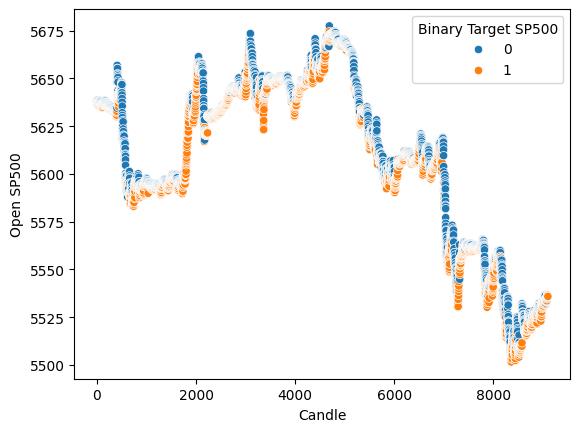

In [24]:
#It appears that one variable that separates the data well is time
sns.scatterplot(data=merged_df,x="Candle",y="Open SP500",hue="Binary Target SP500")

<Axes: xlabel='Open T5Y', ylabel='Open SP500'>

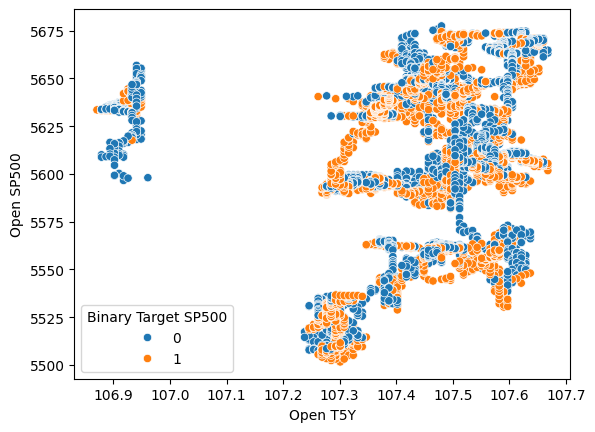

In [25]:
#It appears that one variable that separates the data well is time
sns.scatterplot(data=merged_df,x="Open T5Y",y="Open SP500",hue="Binary Target SP500")

In [81]:
#Import the libraries we need
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import RobustScaler
import time
from numpy.random import rand,randn
from scipy.optimize import minimize

In [82]:
#Define the number of splits we want
splits = 10

In [83]:
#Create the time series object
tscv = TimeSeriesSplit(n_splits = splits, gap=look_ahead)

In [84]:
#Store the models in a list
models = [LinearRegression(),
         Lasso(),
         SGDRegressor(),
         LinearSVR(),
         RandomForestRegressor(),
         GradientBoostingRegressor(),
         BaggingRegressor(),
         AdaBoostRegressor(),
         MLPRegressor(hidden_layer_sizes=(10,4),early_stopping=True),
         ]

In [85]:
#Define a function to initialize our models
def initialize_models():
    models = [LinearRegression(),
         Lasso(),
         SGDRegressor(),
         LinearSVR(),
         RandomForestRegressor(),
         GradientBoostingRegressor(),
         BaggingRegressor(),
         AdaBoostRegressor(),
         MLPRegressor(hidden_layer_sizes=(10,4),early_stopping=True),
         ]

In [86]:
#Create 3 dataframes to measure our performance
#Before we do that, we will define the columns and idexes
columns = ["Linear Regression",
          "Lasso",
          "SGD Regressor",
          "Linear SVR",
          "Random Forest Regressor",
          "Gradient Boosting Regressor",
          "Bagging Regressor",
          "Ada Boost Regressor",
          "MLP Regressor"]
indexes = np.arange(0,10)


#First dataframe stores our error levels using just the ordinary SP500 OHCL
SP500_error = pd.DataFrame(columns=columns,index=indexes)
#Second dataframe stores our error levels using just the ordinary Treasury Yield OHCL
TY5_error = pd.DataFrame(columns=columns,index=indexes)
#Last dataframe stores our error levels using all the data we have
total_error = pd.DataFrame(columns=columns,index=indexes)

In [87]:
#Now we will define the inputs and target
target = "Target SP500"
predictors = ["Open T5Y",
              "Close T5Y",
              "High T5Y",
              "Low T5Y",
              "Open SP500",
              "Close SP500",
              "High SP500",
              "Low SP500"
             ]

In [88]:
#Reset the index
merged_df.reset_index(inplace=True)

In [89]:
#Scale the data
scaled_data = pd.DataFrame(RobustScaler().fit_transform(merged_df.loc[:,predictors]),columns=predictors,index=np.arange(0,merged_df.shape[0]))

In [45]:
#Now we will perform cross validation
#First we iterate over all the models we have
for j in np.arange(0,len(models)):
    for i,(train,test) in enumerate(tscv.split(merged_df)):
        #Prepare the models
        initialize_models()
        #Prepare the data
        X_train = scaled_data.loc[train[0]:train[-1],predictors]
        X_test = scaled_data.loc[test[0]:test[-1],predictors]
        y_train = merged_df.loc[train[0]:train[-1],target]
        y_test = merged_df.loc[test[0]:test[-1],target]
        #Now fit each model and measure its accuracy
        models[j].fit(X_train,y_train)
        SP500_error.iloc[i,j] = root_mean_squared_error(y_test,models[j].predict(X_test))
        print(f"Completed fitting model {models[j]}")

Completed fitting model LinearRegression()
Completed fitting model LinearRegression()
Completed fitting model LinearRegression()
Completed fitting model LinearRegression()
Completed fitting model LinearRegression()
Completed fitting model LinearRegression()
Completed fitting model LinearRegression()
Completed fitting model LinearRegression()
Completed fitting model LinearRegression()
Completed fitting model LinearRegression()
Completed fitting model Lasso()
Completed fitting model Lasso()


Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.755e+01, tolerance: 6.485e+01
  model = cd_fast.enet_coordinate_descent(


Completed fitting model Lasso()
Completed fitting model Lasso()
Completed fitting model Lasso()
Completed fitting model Lasso()
Completed fitting model Lasso()
Completed fitting model Lasso()
Completed fitting model Lasso()


Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.061e+03, tolerance: 6.268e+02
  model = cd_fast.enet_coordinate_descent(
Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.267e+03, tolerance: 1.027e+03
  model = cd_fast.enet_coordinate_descent(


Completed fitting model Lasso()
Completed fitting model SGDRegressor()
Completed fitting model SGDRegressor()
Completed fitting model SGDRegressor()
Completed fitting model SGDRegressor()
Completed fitting model SGDRegressor()
Completed fitting model SGDRegressor()
Completed fitting model SGDRegressor()
Completed fitting model SGDRegressor()
Completed fitting model SGDRegressor()
Completed fitting model SGDRegressor()


Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the wa

Completed fitting model LinearSVR()
Completed fitting model LinearSVR()
Completed fitting model LinearSVR()
Completed fitting model LinearSVR()
Completed fitting model LinearSVR()
Completed fitting model LinearSVR()
Completed fitting model LinearSVR()
Completed fitting model LinearSVR()
Completed fitting model LinearSVR()
Completed fitting model LinearSVR()
Completed fitting model RandomForestRegressor()
Completed fitting model RandomForestRegressor()
Completed fitting model RandomForestRegressor()
Completed fitting model RandomForestRegressor()
Completed fitting model RandomForestRegressor()
Completed fitting model RandomForestRegressor()
Completed fitting model RandomForestRegressor()
Completed fitting model RandomForestRegressor()
Completed fitting model RandomForestRegressor()
Completed fitting model RandomForestRegressor()
Completed fitting model GradientBoostingRegressor()
Completed fitting model GradientBoostingRegressor()
Completed fitting model GradientBoostingRegressor()
Comp

Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Completed fitting model MLPRegressor(early_stopping=True, hidden_layer_sizes=(10, 4))


Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Completed fitting model MLPRegressor(early_stopping=True, hidden_layer_sizes=(10, 4))


Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Completed fitting model MLPRegressor(early_stopping=True, hidden_layer_sizes=(10, 4))


Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Completed fitting model MLPRegressor(early_stopping=True, hidden_layer_sizes=(10, 4))


Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Completed fitting model MLPRegressor(early_stopping=True, hidden_layer_sizes=(10, 4))


Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Completed fitting model MLPRegressor(early_stopping=True, hidden_layer_sizes=(10, 4))


Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Completed fitting model MLPRegressor(early_stopping=True, hidden_layer_sizes=(10, 4))


Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Completed fitting model MLPRegressor(early_stopping=True, hidden_layer_sizes=(10, 4))


Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Completed fitting model MLPRegressor(early_stopping=True, hidden_layer_sizes=(10, 4))
Completed fitting model MLPRegressor(early_stopping=True, hidden_layer_sizes=(10, 4))


Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [46]:
SP500_error

Linear Regression     Lasso SGD Regressor   Linear SVR  \
0          2.959793  4.325775      2.042602  4991.572588   
1          6.405784  7.554707      6.328335  4151.937578   
2          4.335378  6.263688      4.360988  2928.837558   
3          3.701508  4.466661      3.731531   955.106461   
4          4.051335  5.953803      4.107229   672.204258   
5           4.65324  4.912822      4.561171  1320.717449   
6          3.771216   4.41495      3.776513  1870.414233   
7          7.984898  9.880588      8.019307  1619.116199   
8          5.754879  7.945823      5.787889    37.343969   
9          5.489664  6.747245      5.537665    10.634785   

  Random Forest Regressor Gradient Boosting Regressor Bagging Regressor  \
0                3.625602                    2.870261          4.013543   
1               14.717963                     14.2305         14.690853   
2                7.301129                    6.837644          7.936002   
3                4.872122                    3.874741          5.336129   
4                7.034942                    6.638061          7.145481   
5                6.948727                    5.637268          7.276076   
6                6.379759                    4.649114          6.317026   
7               24.632527                   26.101981          24.81636   
8                7.955608                     7.79312          8.035088   
9                9.329779                     8.56668          9.421849   

  Ada Boost Regressor MLP Regressor  
0            2.696536   5555.638658  
1           12.871053   5461.782346  
2            8.203406   4352.609588  
3            5.459607   1759.019058  
4            8.995955   5659.164407  
5            6.841776   1780.625406  
6            4.675382   2373.085348  
7           27.888265    3009.58918  
8            7.928289   2359.930989  
9           14.090799   3503.532085

In [43]:
TY5_error

Linear Regression      Lasso SGD Regressor   Linear SVR  \
0          9.300242   8.633107      5.202903  4106.716667   
1         40.479304  39.864107     40.559935  3953.466582   
2         39.245318  38.414099     39.401473  3791.686419   
3         24.998135  24.503309     25.651189  3225.617884   
4          33.75247   34.86916     33.855785  2828.197892   
5         20.878276  20.922631     21.074185  1639.219346   
6          34.23625  33.192976     33.832139   502.523349   
7         57.496985    57.1422     57.354637    24.849884   
8         74.269869    74.0157     74.235798    37.696172   
9         95.421425   95.67662      95.12673    71.241061   

  Random Forest Regressor Gradient Boosting Regressor Bagging Regressor  \
0                2.663271                    3.576655          2.973096   
1                39.99943                   39.868341         40.132484   
2               35.984523                    36.30036          36.21832   
3               17.932735                   15.437826         18.282161   
4                23.98819                   23.608902         24.254623   
5               26.477552                   25.655542         26.134277   
6               41.408223                   41.270101          41.58751   
7               57.915915                   57.953263         57.888852   
8               80.372713                   79.902557          80.50312   
9               76.067797                   77.561046         76.791117   

  Ada Boost Regressor MLP Regressor  
0            2.390474   5507.244307  
1           39.658976   5089.286906  
2           34.451609   5643.511897  
3           21.229844   5015.296062  
4           28.490825   4075.118684  
5           25.410068   1112.134793  
6           40.896821    965.352637  
7           57.880833   1080.134431  
8           76.788554     218.52058  
9           76.482885    272.804419

In [38]:
total_error

Linear Regression      Lasso SGD Regressor   Linear SVR  \
0           3.34697   5.696405      3.363894   4116.59732   
1          6.328172  30.341624      8.333683  4318.499574   
2          4.171675   6.263688      4.523919  4200.283589   
3          3.725789   4.466661      3.826649  2694.588835   
4          3.935881   5.953803      4.262937   634.262764   
5          4.874648   4.959621      4.845125  1684.022985   
6          3.792445   4.414949      3.851316  2390.040253   
7          8.017037   9.880588      8.061625  2049.902967   
8          5.755811   7.945823      5.939724    144.09841   
9          5.478972   6.747245       5.59327     8.287396   

  Random Forest Regressor Gradient Boosting Regressor Bagging Regressor  \
0                2.456642                    2.744306          2.781281   
1               13.921364                   14.528111         13.865864   
2                8.346614                    6.948221          8.532262   
3                5.122181                    4.129556          5.248339   
4                8.796481                    8.920363          8.468277   
5                8.553267                    6.545162          9.379546   
6                4.634371                     4.69901          4.841316   
7               25.602565                   27.373305         25.740427   
8               11.344775                   12.195908         11.264616   
9               11.335337                    9.930348         11.441442   

  Ada Boost Regressor MLP Regressor  
0            2.505079   5451.279561  
1           13.510273   4807.589848  
2            8.352072   4820.782771  
3            5.883613   2662.162238  
4            9.633779   2580.627888  
5            7.619321   5628.835505  
6            4.921807   2206.179729  
7           27.978593   4014.120021  
8             8.64814   5545.431415  
9           13.094109   2405.581021

In [48]:
#Feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [49]:
#Get the best model
model = SGDRegressor()

In [54]:
#Let us perform feature selection for the best model we have
sfs_sgd_regressor = SFS(model,
                            (1,8),
                            forward=True,
                            cv=5,
                            n_jobs=-1,
                            scoring="neg_mean_squared_error"
                           )

In [57]:
#Fit the feature selector
sfs_1 = sfs_sgd_regressor.fit(scaled_data.loc[:,predictors],merged_df.loc[:,target])

In [58]:
#Which features were most important to our model?
sfs_1.k_feature_names_

('Close SP500', 'High SP500', 'Low SP500')

None of the features related to the Treasury yields were selected! It appears the relationship may not be reliable enough for us.

In [15]:
#None the less, let us attempt to optimize the model
from scipy import optimize

In [35]:
#Create a training and validation set
scaled_data = merged_df.loc[:,predictors]
scaled_data = (scaled_data - scaled_data.mean()) / (scaled_data.std())
#Create the two datasets
train_data , test_data = scaled_data.loc[:(scaled_data.shape[0]//2),:],scaled_data.loc[(scaled_data.shape[0]//2):,:]

In [19]:
#Let's write out the column mean and standard deviations
#We'll store the mean first 
#Then the standard deviation
scale_factors = pd.DataFrame(columns=predictors,index=(0,1))
#Save the mean and std value of each respective column
for i in (np.arange(0,len(predictors))):
    #Calculate and store the values of each column mean and std
    scale_factors.iloc[0,i] = merged_df.loc[:,predictors[i]].mean()
    scale_factors.iloc[1,i] = merged_df.loc[:,predictors[i]].std()

#Inspect the data
scale_factors

Open T5Y   Close T5Y   High T5Y     Low T5Y  Open SP500  Close SP500  \
0  107.427534  107.427589  107.43027  107.424853  5608.60478  5608.590758   
1    0.168681    0.168605   0.168845    0.168522   43.426462    43.437178   

    High SP500    Low SP500  
0  5609.244572  5607.934804  
1    43.293179    43.549755

In [20]:
#Write it out to csv format
scale_factors.to_csv("/home/volatily/.wine/drive_c/Program Files/MetaTrader 5/MQL5/Files/sp500_treasury_yields_scale.csv")

In [36]:
#Define the objective function 
def objective(x):
    #Initialize the model with the new parameters
    model = SGDRegressor(alpha=x[0],shuffle=False,eta0=x[1])
    #We need a dataframe to store our current model accuracy levels
    current_accuracy = pd.DataFrame(index=np.arange(0,splits),columns=["Error"])
    #Now we perform cross validation
    for i,(train,test) in enumerate(tscv.split(train_data)):
        #Split the data into a training set and test set
        X_train = train_data.loc[train[0]:train[-1],predictors]
        X_test  = train_data.loc[test[0]:test[-1],predictors]
        y_train = merged_df.loc[train[0]:train[-1],target]
        y_test  = merged_df.loc[test[0]:test[-1],target]
        #Fit the model
        model.fit(X_train,y_train)
        #Record the accuracy
        current_accuracy.iloc[i,0] = root_mean_squared_error(y_test,model.predict(X_test))
    #Return the model accuracrcy
    return(current_accuracy.iloc[:,0].mean())

In [43]:
#Let's optimize our model
#Let us measure how much time this takes.
start = time.time()

#Create a dataframe to measure the error rates
starting_point_error = pd.DataFrame(index=np.arange(0,21),columns=["Average CV RMSE"])
starting_point_error["Iteration"] = np.arange(0,21)

#Let us first find a good starting point for our optimization algorithm
for i in np.arange(0,21):
    #Set a new starting point
    new_starting_point = (10.0 ** -i)
    #Store error rates
    starting_point_error.iloc[i,0] = objective([new_starting_point  ,new_starting_point]) 

#Record the time stamp at the end
stop = time.time()

#Report the amount of time taken
print(f"Completed in {stop - start} seconds")

Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improv

Completed in 41.863527059555054 seconds


In [44]:
starting_point_error["alpha"] = 0
starting_point_error["eta0"] = 0

for i in np.arange(0,21):
    starting_point_error.loc[i,"alpha"] = (10.0 ** -i)
    starting_point_error.loc[i,"eta0"] = (10.0 ** -i)

starting_point_error

C:\users\volatily\Temp\ipykernel_500\1974050336.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  starting_point_error.loc[i,"alpha"] = (10.0 ** -i)
C:\users\volatily\Temp\ipykernel_500\1974050336.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  starting_point_error.loc[i,"eta0"] = (10.0 ** -i)


Average CV RMSE  Iteration         alpha          eta0
0        14.192856          0  1.000000e+00  1.000000e+00
1       417.597948          1  1.000000e-01  1.000000e-01
2       471.631464          2  1.000000e-02  1.000000e-02
3       488.127576          3  1.000000e-03  1.000000e-03
4      1004.628407          4  1.000000e-04  1.000000e-04
5      2944.204424          5  1.000000e-05  1.000000e-05
6      4947.888817          6  1.000000e-06  1.000000e-06
7      5540.856636          7  1.000000e-07  1.000000e-07
8      5619.928633          8  1.000000e-08  1.000000e-08
9      5628.108334          9  1.000000e-09  1.000000e-09
10     5628.929123         10  1.000000e-10  1.000000e-10
11     5629.011231         11  1.000000e-11  1.000000e-11
12     5629.019442         12  1.000000e-12  1.000000e-12
13      5629.02028         13  1.000000e-13  1.000000e-13
14     5629.020354         14  1.000000e-14  1.000000e-14
15     5629.020354         15  1.000000e-15  1.000000e-15
16     5629.020354         16  1.000000e-16  1.000000e-16
17     5629.020354         17  1.000000e-17  1.000000e-17
18     5629.020354         18  1.000000e-18  1.000000e-18
19     5629.020354         19  1.000000e-19  1.000000e-19
20     5629.020354         20  1.000000e-20  1.000000e-20

[Text(0.5, 1.0, 'Optimizing our SGD Regressor on Training Data')]

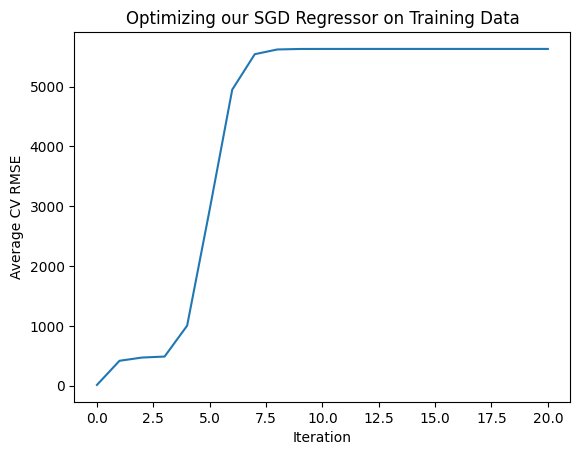

In [153]:
#Let's visualize our error levels
sns.lineplot(data=starting_point_error,x="Iteration",y="Average CV RMSE").set(title="Optimizing our SGD Regressor on Training Data")

In [170]:
#Now let us perform a local search in the space that appears optimal
pt = abs(((10 ** -2) + rand(2) * ((1) - (10 ** -2))))
pt

array([0.94169659, 0.33068772])

In [171]:
#Let's try optimize our model
start = time.time()
bounds = ((0.01,1),(0.01,1))
result = minimize(objective,pt,bounds=bounds,method="L-BFGS-B")
stop = time.time()
print(f"Task completed in {stop - start} seconds")

Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improv

Task completed in 106.46932244300842 seconds


In [173]:
#What are the results?
result

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 11.428966326221078
        x: [ 1.040e-01  3.193e-01]
      nit: 24
      jac: [ 9.160e+00 -1.475e+01]
     nfev: 351
     njev: 117
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

In [174]:
#Now let us compare the default model and the customized model
default_model = SGDRegressor()
customized_model = SGDRegressor(alpha=result.x[0],shuffle=False,eta0=result.x[1])

In [175]:
#Default model accuracy
default_model.fit(train_data.loc[:,predictors],merged_df.loc[:(merged_df.shape[0]//2),target])
root_mean_squared_error(merged_df.loc[(merged_df.shape[0]//2):,target],default_model.predict(test_data.loc[:,predictors]))

5.793428451043455

In [176]:
#Customized model accuracy
customized_model.fit(train_data.loc[:,predictors],merged_df.loc[:(merged_df.shape[0]//2),target])
root_mean_squared_error(merged_df.loc[(merged_df.shape[0]//2):,target],customized_model.predict(test_data.loc[:,predictors]))

63.45882351828459

In [90]:
#Let's convert the regression model to ONNX format
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import convert_sklearn
import onnxruntime as ort
import onnx

In [91]:
for i in predictors:
    merged_df.loc[:,i] = (merged_df.loc[:,i] - merged_df.loc[:,i].mean()) / merged_df.loc[:,i].std()

In [92]:
#Prepare the model
model = SGDRegressor()
model.fit(merged_df.loc[:,predictors],merged_df.loc[:,"Target SP500"])

SGDRegressor()

In [93]:
#Define the input types
initial_type_float = [("float_input",FloatTensorType([1,len(predictors)]))]
onnx_model_float = convert_sklearn(model,initial_types=initial_type_float,target_opset=12)

In [94]:
#ONNX file name
onnx_file_name = "SP500_ONNX_FLOAT_M1.onnx"
#ONNX file
onnx.save_model(onnx_model_float,onnx_file_name)

In [189]:
# load the ONNX model and inspect input and ouput shapes
onnx_session = ort.InferenceSession(onnx_file_name)
input_name = onnx_session.get_inputs()[0].name
output_name = onnx_session.get_outputs()[0].name

In [190]:
#Display information about input tensors in ONNX
print("Information about input tensors in ONNX:")
for i, input_tensor in enumerate(onnx_session.get_inputs()):
    print(f"{i + 1}. Name: {input_tensor.name}, Data Type: {input_tensor.type}, Shape: {input_tensor.shape}")

Information about input tensors in ONNX:
1. Name: float_input, Data Type: tensor(float), Shape: [1, 8]


In [191]:
#Display information about output tensors in ONNX
print("Information about output tensors in ONNX:")
for i, output_tensor in enumerate(onnx_session.get_outputs()):
    print(f"{i + 1}. Name: {output_tensor.name}, Data Type: {output_tensor.type}, Shape: {output_tensor.shape}")

Information about output tensors in ONNX:
1. Name: variable, Data Type: tensor(float), Shape: [1, 1]


In [95]:
#Visualize the model
import netron

In [96]:
#Call netron 
netron.start(onnx_file_name)

Serving 'SP500_ONNX_FLOAT_M1.onnx' at http://localhost:8080


('localhost', 8080)

--------------------------------------------------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 38850)

Exception occurred during processing of request from ('127.0.0.1', 38848)
Traceback (most recent call last):
Traceback (most recent call last):
  File "C:\users\volatily\AppData\Local\Programs\Python\Python310\lib\socketserver.py", line 683, in process_request_thread
    self.finish_request(request, client_address)
  File "C:\users\volatily\AppData\Local\Programs\Python\Python310\lib\socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "C:\users\volatily\AppData\Local\Programs\Python\Python310\lib\socketserver.py", line 747, in __init__
    self.handle()
  File "C:\users\volatily\AppData\Local\Programs\Python\Python310\lib\http\server.py", line 427, in handle
    self.handle_one_request()
  File "C:\users\volatily\AppData\Local\Programs\Python\Python310\lib\http\server.py",